###EMPLOYEE ATTRITION PREDICTION PROJECT
By: Mehak Arora (03601192023), AI/ML, 4th sem

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/Employee Attrition Project/dataset.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv(file_path)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
#dropping duplicates
data.drop_duplicates(inplace=True)

# Find columns with only one unique value
unique=data.nunique()
same_value=unique[unique==1].index.to_list()
print(same_value)
#dropping these columns
data=data.drop(same_value,axis=1)
#dropping marital status,Employee Number-unnecessary
data=data.drop(["MaritalStatus","EmployeeNumber"],axis=1)
#dropping Gender-In Accordance with chi-square test
data=data.drop("Gender",axis=1)
#Converting Attrition columns to int type
data['Attrition']=data['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)
#Dropping the mentioned columns
data=data.drop(["PerformanceRating","HourlyRate","PercentSalaryHike","JobLevel"],axis=1)
#separating categorical data from the data for furthur processing
def separate(data):
  cat_data_columns=data.select_dtypes(include=["object"]).columns
  cat_data=data[cat_data_columns]
  return cat_data
cat_data=separate(data)
data=data.drop(cat_data.columns,axis=1)
print(cat_data.head())
#overtime-binary classification
cat_data["OverTime"]=cat_data["OverTime"].apply(lambda x:0 if x=="No" else 1)
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
#JobRole, EducationField,Department,BusinessTravel require encoding
for column in ["JobRole", "EducationField","Department","BusinessTravel"]:
    cat_data[column] = label_encoder.fit_transform(cat_data[column])
#EXTRACTING THE DEPENDENT VARIABLE(Attrition)
y=data["Attrition"]
data.drop("Attrition",axis=1,inplace=True)
# MERIGING cat_data ,cat_data_dummies to the original dataset-to get our matrix of features
X=pd.concat([data,cat_data],axis=1)
X.head()

['EmployeeCount', 'Over18', 'StandardHours']
      BusinessTravel              Department EducationField  \
0      Travel_Rarely                   Sales  Life Sciences   
1  Travel_Frequently  Research & Development  Life Sciences   
2      Travel_Rarely  Research & Development          Other   
3  Travel_Frequently  Research & Development  Life Sciences   
4      Travel_Rarely  Research & Development        Medical   

                 JobRole OverTime  
0        Sales Executive      Yes  
1     Research Scientist       No  
2  Laboratory Technician      Yes  
3     Research Scientist      Yes  
4  Laboratory Technician       No  


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Department,EducationField,JobRole,OverTime
0,41,1102,1,2,2,3,4,5993,19479,8,...,1,6,4,0,5,2,2,1,7,1
1,49,279,8,1,3,2,2,5130,24907,1,...,3,10,7,1,7,1,1,1,6,0
2,37,1373,2,2,4,2,3,2090,2396,6,...,3,0,0,0,0,2,1,4,2,1
3,33,1392,3,4,4,3,3,2909,23159,1,...,3,8,7,3,0,1,1,1,6,1
4,27,591,2,1,1,3,2,3468,16632,9,...,3,2,2,2,2,2,1,3,2,0


## Testing model on RAW dataset


In [ ]:
#Creating a function(helper), to evaluate model
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_auc_score
def helper(X_train,X_test,y_train,y_test,model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"=======================Model: Decision Trees ==========================")
    print(f"              Accuracy: {accuracy_score(y_test,y_pred)}")
    ROCAUCscore = roc_auc_score(y_test, y_pred)
    print(f"              AUC-ROC Curve : {ROCAUCscore:.4f}")
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print()

    fpr, tpr, thresholds=roc_curve(y_test, y_pred)
    roc_auc=auc(fpr, tpr)
    #Plotting ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

=======================Model: Decision Trees ==========================
              Accuracy: 0.7619047619047619
              AUC-ROC Curve : 0.5654
[[211  36]
 [ 34  13]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       247
           1       0.27      0.28      0.27        47

    accuracy                           0.76       294
   macro avg       0.56      0.57      0.56       294
weighted avg       0.77      0.76      0.76       294




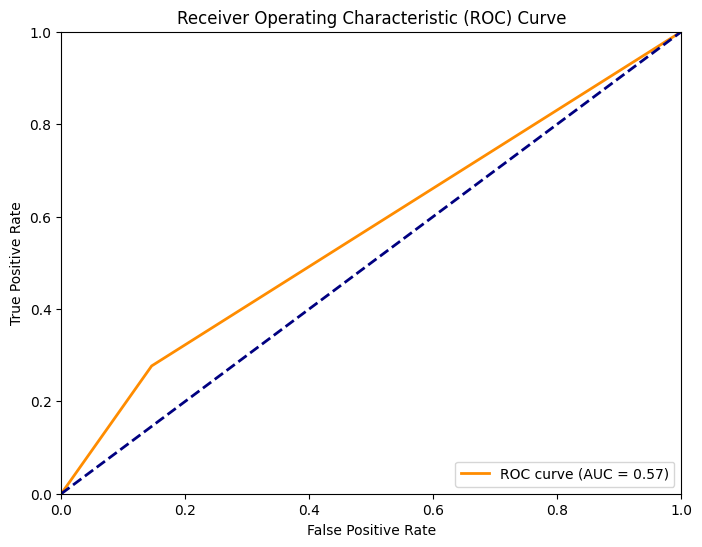

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)
helper(X_train,X_test,y_train,y_test,DecisionTreeClassifier())

#PCA and RandomizedSearchCV
Applying the function for raw data


In [ ]:
#evaluate_model function will be used henceforth insead of helper
def evaluate_model(X_test,y_test,model):
    y_pred=model.predict(X_test)
    print(f"=======================Model: Decision Trees ==========================")
    print(f"              Accuracy: {accuracy_score(y_test,y_pred)}")
    ROCAUCscore = roc_auc_score(y_test, y_pred)
    print(f"              AUC-ROC Curve : {ROCAUCscore:.4f}")
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print()

    fpr, tpr, thresholds=roc_curve(y_test, y_pred)
    roc_auc=auc(fpr, tpr)
    #Plotting ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

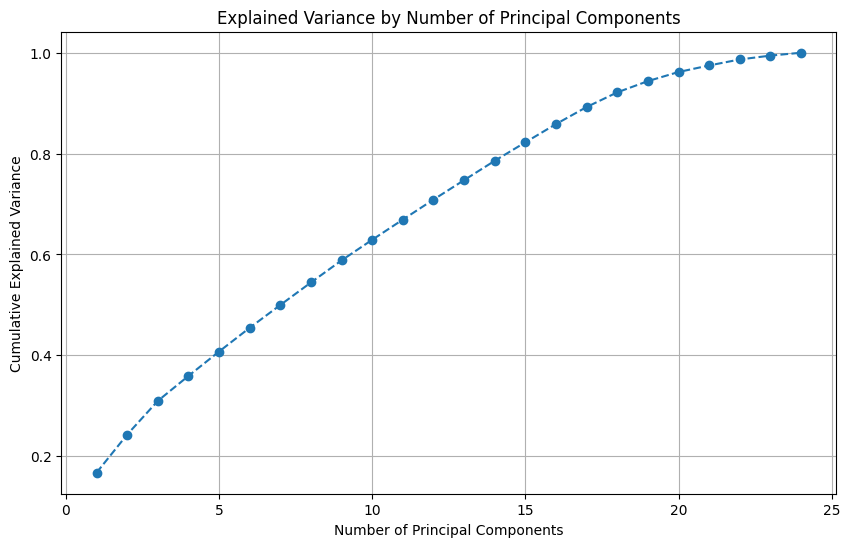


Best Parameters: {'pca__n_components': 20, 'model__min_samples_split': 5, 'model__min_samples_leaf': 4, 'model__max_depth': 10, 'model__criterion': 'entropy'}

=======================Model: Decision Trees ==========================
              Accuracy: 0.7891156462585034
              AUC-ROC Curve : 0.5385
[[224  23]
 [ 39   8]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       247
           1       0.26      0.17      0.21        47

    accuracy                           0.79       294
   macro avg       0.55      0.54      0.54       294
weighted avg       0.76      0.79      0.77       294




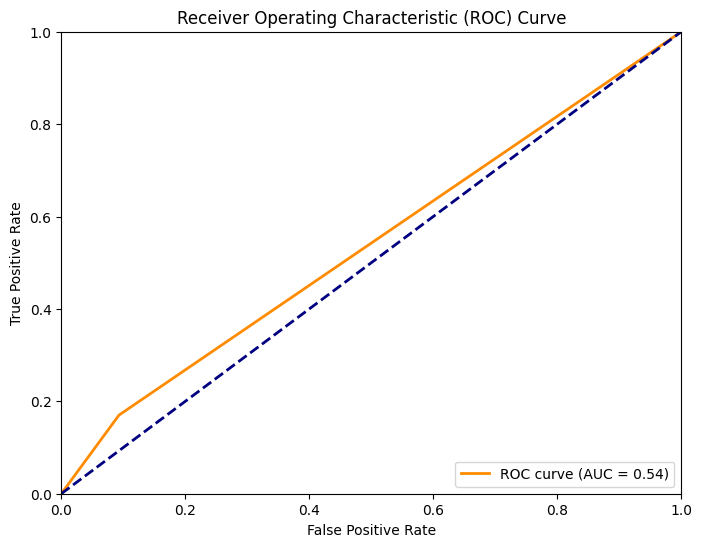

In [ ]:
#sampled_dataset_results: It is a function that accepts X,y(which will be modified later for managing imbalance in data) and applies StandardScaling, PCA and RandomizedSearchCV
#Pipelining is used

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

classifier=DecisionTreeClassifier()

def sampled_dataset_results(X,y,classifier):
  #Separating training set and test set
  X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)

  #SCALING NUMERICAL FEATURES
  from sklearn.preprocessing import StandardScaler
  scaler=StandardScaler()
  X_train_scaled=scaler.fit_transform(X_train)

  #APPLYING PCA
  from sklearn.decomposition import PCA
  pca=PCA()
  X_train_pca=pca.fit_transform(X_train_scaled)

  # Plot explained variance
  plt.figure(figsize=(10, 6))
  plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_),
         marker='o', linestyle='--')
  plt.xlabel('Number of Principal Components')
  plt.ylabel('Cumulative Explained Variance')
  plt.title('Explained Variance by Number of Principal Components')
  plt.grid(True)
  plt.show()
  print()

  #Defining pipelining with chosen number of compnents
  pipeline=Pipeline([
      ("scaler",StandardScaler()),
      ("pca",PCA()),
      ("model",classifier)
  ])

  # Define the parameter grid for RandomizedSearchCV
  param_distributions = {
    'pca__n_components': [5, 10, 15, 20],
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
  }

  # Create a RandomizedSearchCV object
  random_search = RandomizedSearchCV(pipeline, param_distributions, cv=5, n_jobs=-1)
  random_search.fit(X_train, y_train)

  # Get the best model and its parameters
  best_model = random_search.best_estimator_
  best_params = random_search.best_params_
  print(f"Best Parameters: {best_params}")
  print()

  # Evaluate the best model on the test set
  evaluate_model(X_test,y_test,best_model)


sampled_dataset_results(X,y,classifier)

#It can be inferred that we have an IMBALANCED DATASET
###The model performs better for the majority class (class 0) but struggles with the minority class (class 1). The lower recall for class 1 indicates that the model does not identify many of the actual class 1 cases.

# OVERSAMPLING


## Random Oversampling








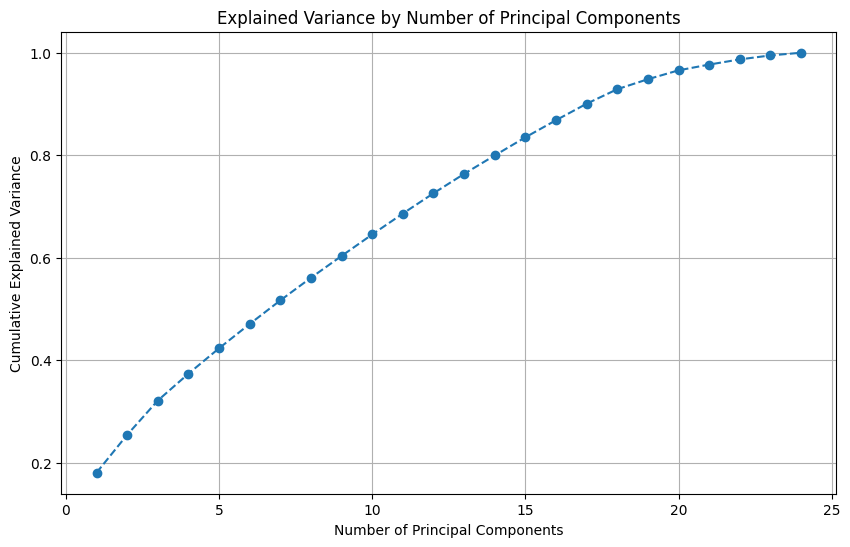


Best Parameters: {'pca__n_components': 15, 'model__min_samples_split': 2, 'model__min_samples_leaf': 2, 'model__max_depth': None, 'model__criterion': 'gini'}

=======================Model: Decision Trees ==========================
              Accuracy: 0.8906882591093117
              AUC-ROC Curve : 0.8907
[[204  43]
 [ 11 236]]
              precision    recall  f1-score   support

           0       0.95      0.83      0.88       247
           1       0.85      0.96      0.90       247

    accuracy                           0.89       494
   macro avg       0.90      0.89      0.89       494
weighted avg       0.90      0.89      0.89       494




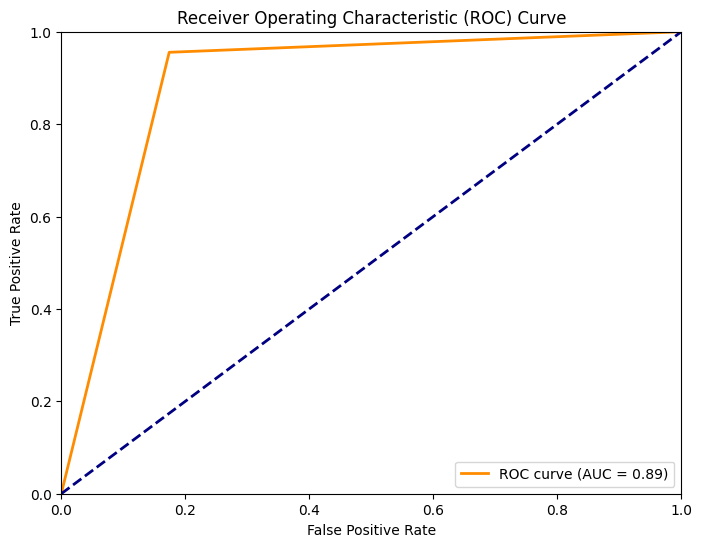

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
X_resampled,y_resampled=ros.fit_resample(X,y)

sampled_dataset_results(X_resampled,y_resampled,classifier)

## SMOTE-Synthetic Minority Oversampling Technique








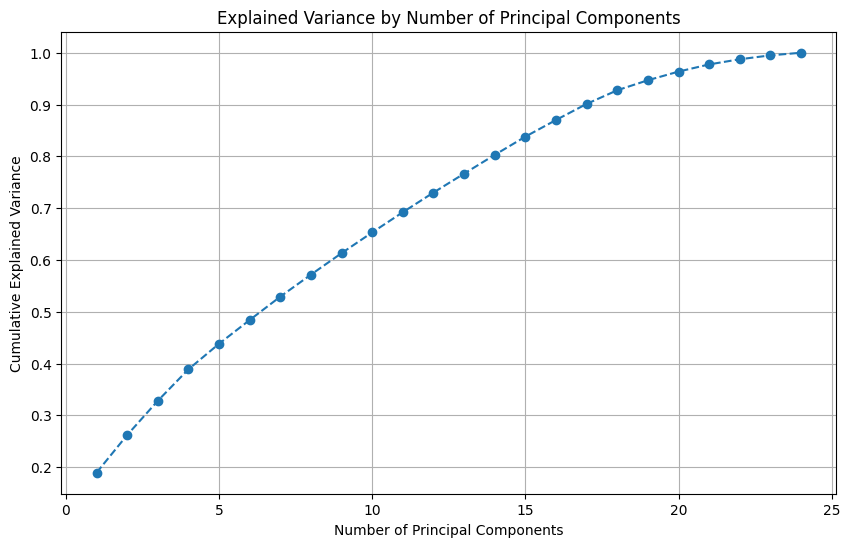


Best Parameters: {'pca__n_components': 15, 'model__min_samples_split': 10, 'model__min_samples_leaf': 4, 'model__max_depth': 20, 'model__criterion': 'entropy'}

=======================Model: Decision Trees ==========================
              Accuracy: 0.7651821862348178
              AUC-ROC Curve : 0.7652
[[192  55]
 [ 61 186]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       247
           1       0.77      0.75      0.76       247

    accuracy                           0.77       494
   macro avg       0.77      0.77      0.77       494
weighted avg       0.77      0.77      0.77       494




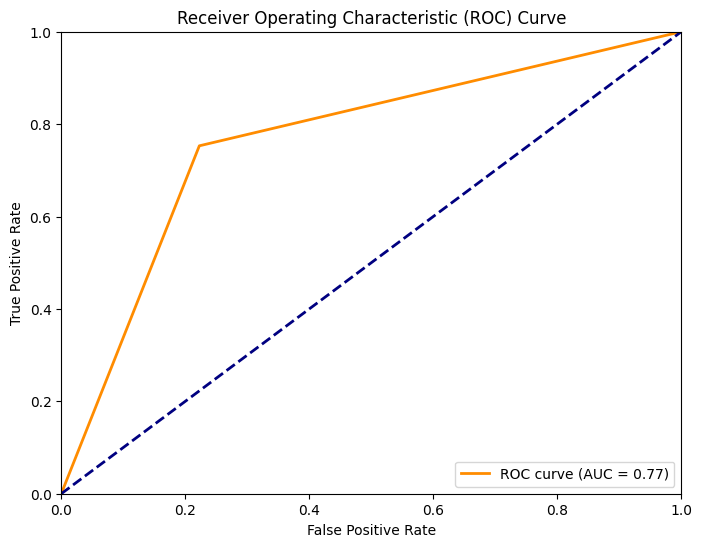

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=0,k_neighbors=5)
X_resampled,y_resampled=sm.fit_resample(X,y)

sampled_dataset_results(X_resampled,y_resampled,classifier)

## ADASYN-Adaptive Synthetic Sampling








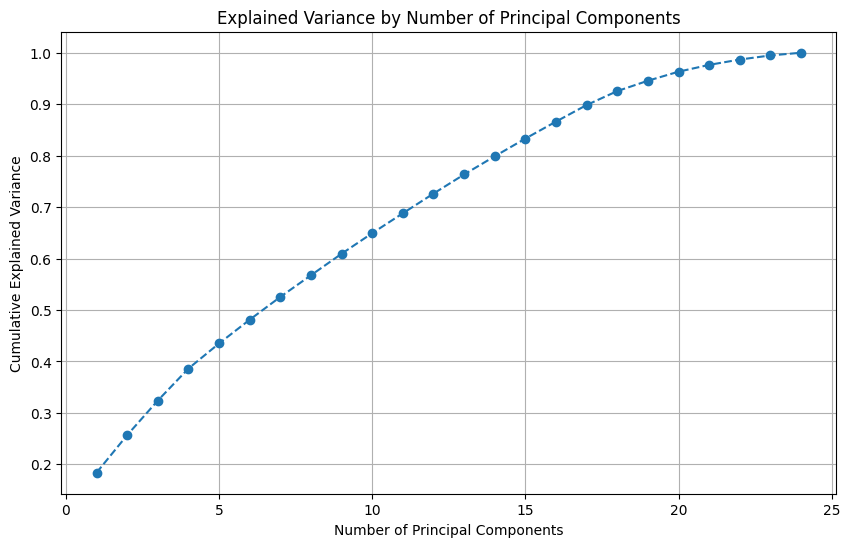


Best Parameters: {'pca__n_components': 20, 'model__min_samples_split': 5, 'model__min_samples_leaf': 4, 'model__max_depth': None, 'model__criterion': 'gini'}

=======================Model: Decision Trees ==========================
              Accuracy: 0.7724425887265136
              AUC-ROC Curve : 0.7718
[[196  51]
 [ 58 174]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       247
           1       0.77      0.75      0.76       232

    accuracy                           0.77       479
   macro avg       0.77      0.77      0.77       479
weighted avg       0.77      0.77      0.77       479




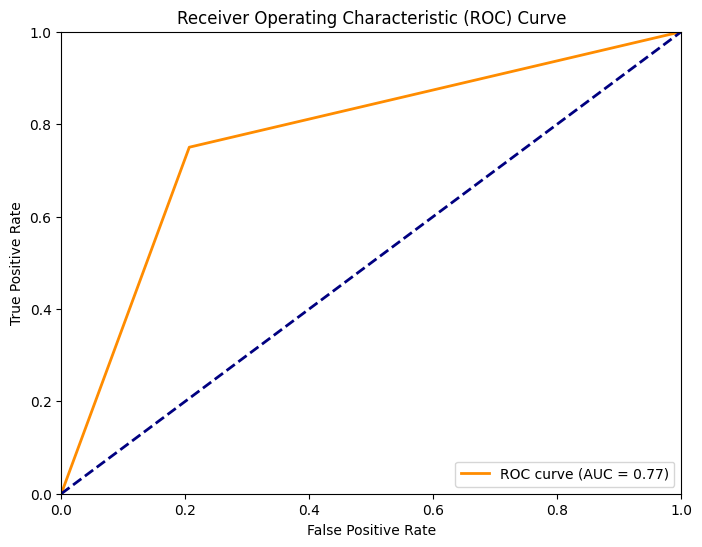

In [ ]:
from imblearn.over_sampling import ADASYN
ad=ADASYN(random_state=0,n_neighbors=5)
X_resampled,y_resampled=ad.fit_resample(X,y)

sampled_dataset_results(X_resampled,y_resampled,classifier)

# UNDERSAMPLING


## Random UnderSampling








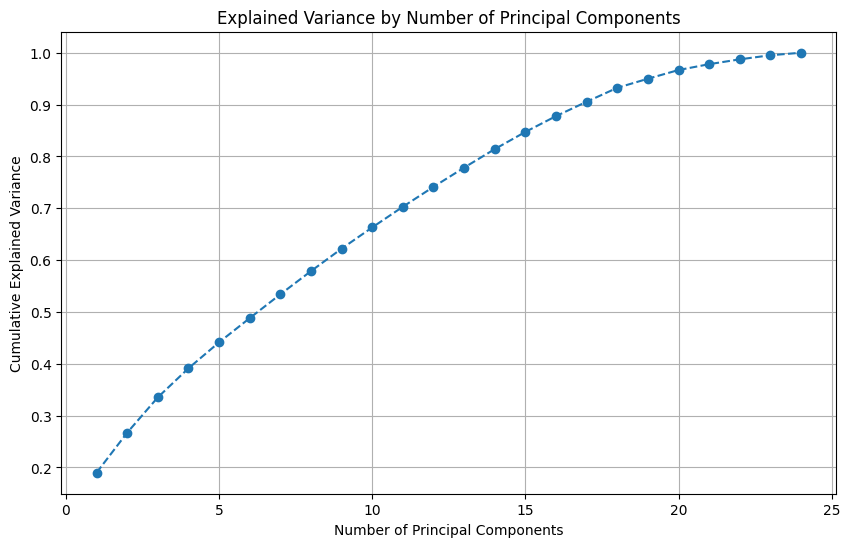


Best Parameters: {'pca__n_components': 15, 'model__min_samples_split': 5, 'model__min_samples_leaf': 2, 'model__max_depth': 30, 'model__criterion': 'entropy'}

=======================Model: Decision Trees ==========================
              Accuracy: 0.6526315789473685
              AUC-ROC Curve : 0.6520
[[34 14]
 [19 28]]
              precision    recall  f1-score   support

           0       0.64      0.71      0.67        48
           1       0.67      0.60      0.63        47

    accuracy                           0.65        95
   macro avg       0.65      0.65      0.65        95
weighted avg       0.65      0.65      0.65        95




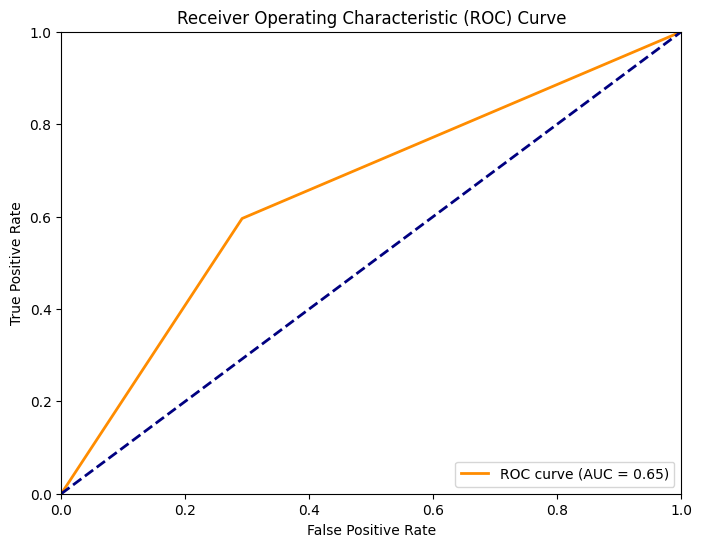

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=0)
X_resampled,y_resampled=rus.fit_resample(X,y)

sampled_dataset_results(X_resampled,y_resampled,classifier)

##Tomek Links






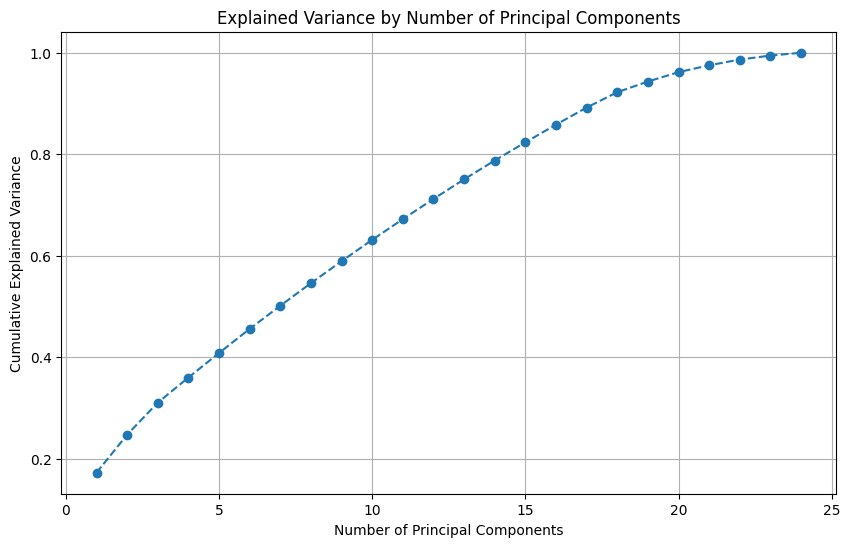


Best Parameters: {'pca__n_components': 5, 'model__min_samples_split': 2, 'model__min_samples_leaf': 4, 'model__max_depth': 20, 'model__criterion': 'entropy'}

=======================Model: Decision Trees ==========================
              Accuracy: 0.7554744525547445
              AUC-ROC Curve : 0.5810
[[192  34]
 [ 33  15]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       226
           1       0.31      0.31      0.31        48

    accuracy                           0.76       274
   macro avg       0.58      0.58      0.58       274
weighted avg       0.76      0.76      0.76       274




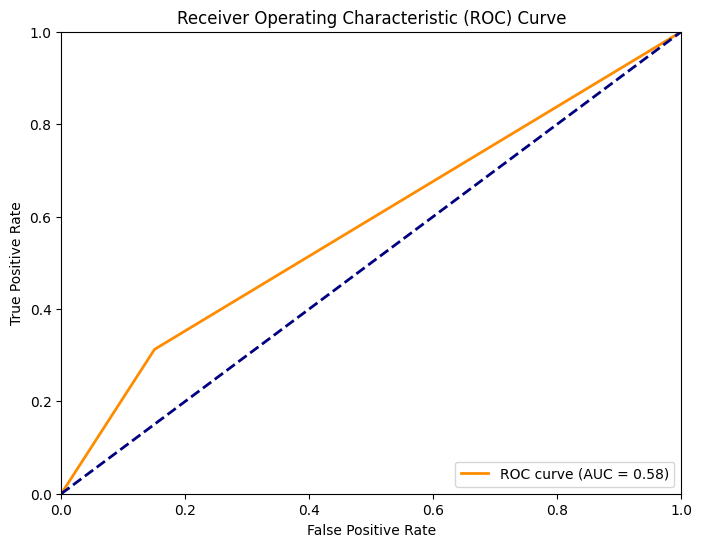

In [ ]:
from imblearn.under_sampling import TomekLinks
tl=TomekLinks(sampling_strategy='majority')
X_resampled,y_resampled=tl.fit_resample(X,y)

sampled_dataset_results(X_resampled,y_resampled,classifier)

## Edited Nearest Neighbors (ENN)







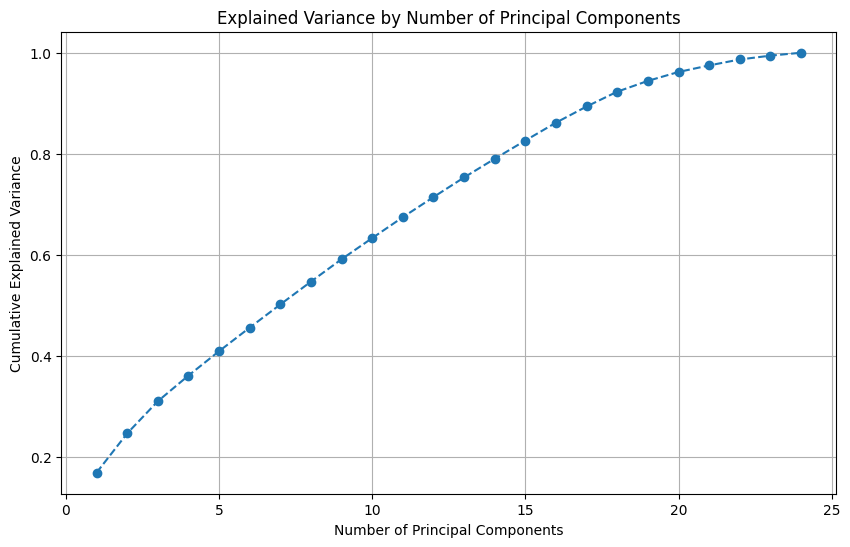


Best Parameters: {'pca__n_components': 10, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_depth': 10, 'model__criterion': 'entropy'}

=======================Model: Decision Trees ==========================
              Accuracy: 0.7729468599033816
              AUC-ROC Curve : 0.6352
[[142  18]
 [ 29  18]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       160
           1       0.50      0.38      0.43        47

    accuracy                           0.77       207
   macro avg       0.67      0.64      0.65       207
weighted avg       0.76      0.77      0.76       207




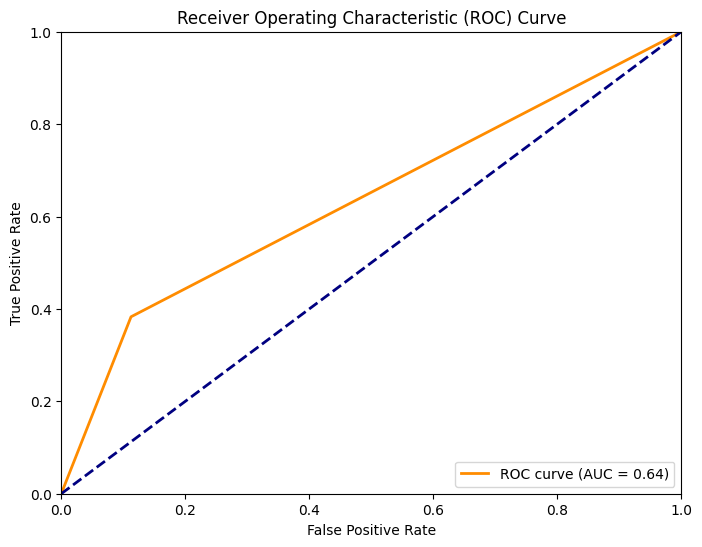

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours
enn=EditedNearestNeighbours(sampling_strategy='majority')
X_resampled,y_resampled=enn.fit_resample(X,y)

sampled_dataset_results(X_resampled,y_resampled,classifier)

# HYBRID


## SMOTE-TomekLinks






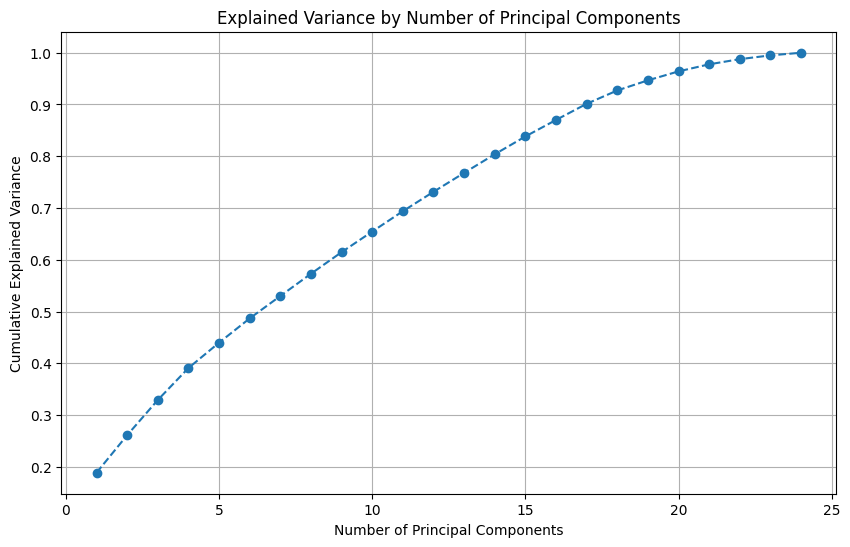


Best Parameters: {'pca__n_components': 20, 'model__min_samples_split': 2, 'model__min_samples_leaf': 2, 'model__max_depth': 30, 'model__criterion': 'entropy'}

=======================Model: Decision Trees ==========================
              Accuracy: 0.7393162393162394
              AUC-ROC Curve : 0.7393
[[177  57]
 [ 65 169]]
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       234
           1       0.75      0.72      0.73       234

    accuracy                           0.74       468
   macro avg       0.74      0.74      0.74       468
weighted avg       0.74      0.74      0.74       468




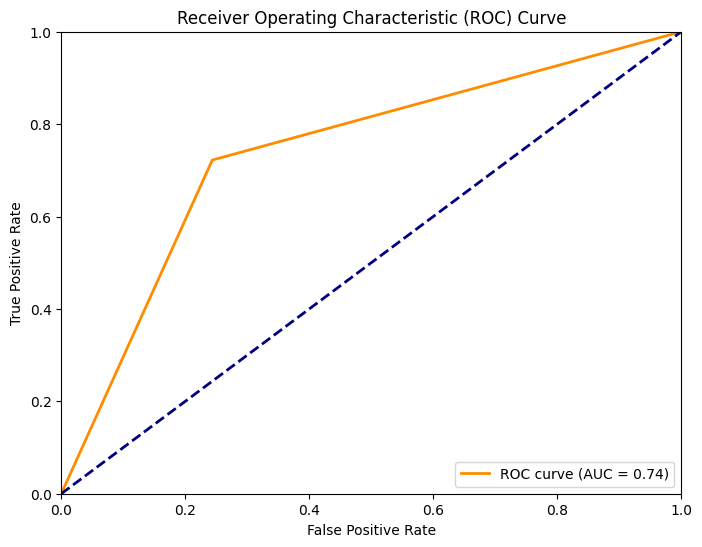

In [ ]:
from imblearn.combine import SMOTETomek
smotetomek = SMOTETomek(random_state=0)
X_resampled,y_resampled=smotetomek.fit_resample(X,y)
sampled_dataset_results(X_resampled,y_resampled,classifier)

##  SMOTE-ENN






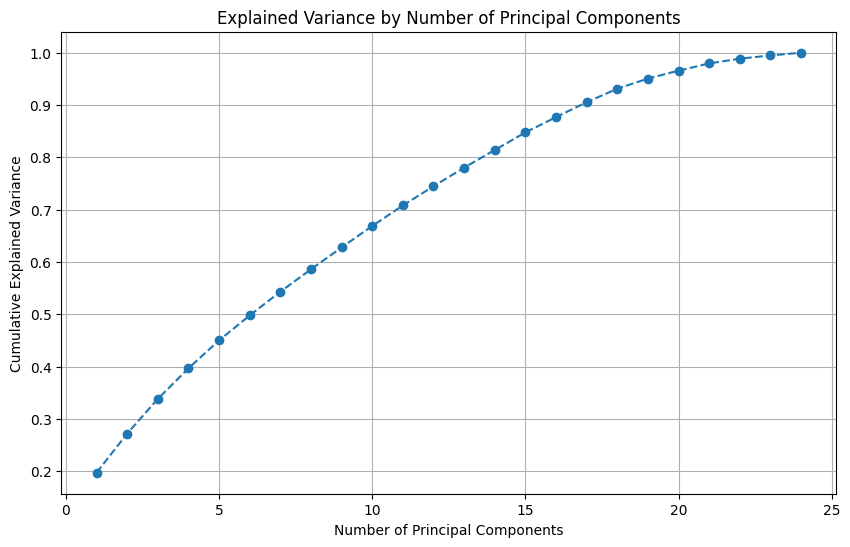


Best Parameters: {'pca__n_components': 15, 'model__min_samples_split': 2, 'model__min_samples_leaf': 4, 'model__max_depth': 20, 'model__criterion': 'entropy'}

=======================Model: Decision Trees ==========================
              Accuracy: 0.8061224489795918
              AUC-ROC Curve : 0.8069
[[104  24]
 [ 33 133]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       128
           1       0.85      0.80      0.82       166

    accuracy                           0.81       294
   macro avg       0.80      0.81      0.80       294
weighted avg       0.81      0.81      0.81       294




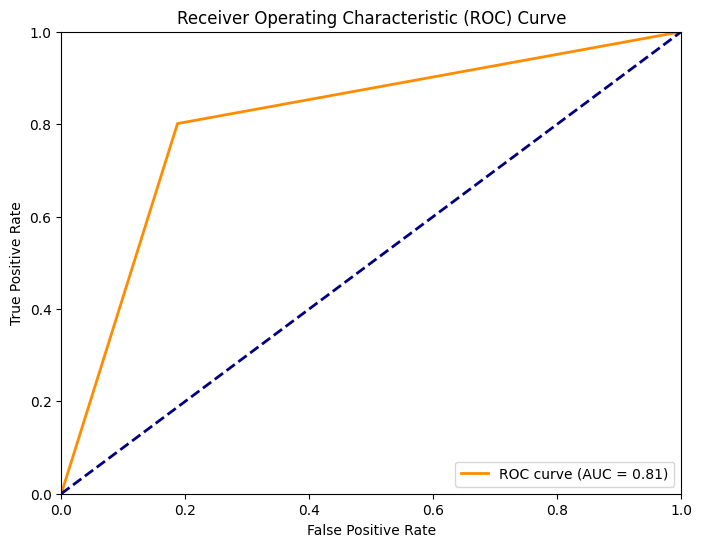

In [ ]:
from imblearn.combine import SMOTEENN
smoteenn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smoteenn.fit_resample(X, y)
sampled_dataset_results(X_resampled, y_resampled,classifier)